# **Predicting Survival on the Titanic: A Machine Learning Approach**

---

**Columns Detail**

Below is the short description of columns that are present in our dataset

* PassengerId: Unique identifier for each passenger.
* Survived: Binary outcome (0 = No, 1 = Yes), indicating
 whether the passenger survived.
* Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd), representing socio-economic status.
* Name: Full name of the passenger.
* Sex: Gender of the passenger (male or female).
* Age: Age of the passenger in years.
*SibSp: Number of siblings or spouses aboard the Titanic.
* Parch: Number of parents or children aboard the Titanic.
* Ticket: Ticket number for the passenger.
* Fare: Fare paid for the ticket.
* Cabin: Cabin number where the passenger stayed.
* Embarked: Port of embarkation (C = Cherbourg, Q =  Queenstown, S = Southampton).

**Problem:** Predict whether a passenger on the Titanic would survive or not.


**Objective:** Build an ML model that can accurately classify passengers based on given features.



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Load the datasets**

---



In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Kaggle dataset/Titanic dataset/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **2. Data Preprocessing**

---



In [4]:
# Step 1: Handle missing values by removing and imputing
train_df = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Step 2: Encode categorical variables
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

# **3. Exploratory data analysis (EDA)**

---

**Correlation Matrix**

In [5]:
# Compute the correlation matrix
corr_matrix = train_data.corr()
print(corr_matrix)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.064910 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.339898  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.081163 -0.114631 -0.245489   
Age      -0.064910 -0.339898  0.081163  1.000000 -0.233296 -0.172482   
SibSp    -0.035322  0.083081 -0.114631 -0.233296  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.172482  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.096688  0.159651  0.216225   
Embarked -0.167675  0.162098  0.108262 -0.018754  0.068230  0.039798   

              Fare  Embarked  
Survived  0.257307 -0.167675  
Pclass   -0.549500  0.162098  
Sex      -0.182333  0.108262  
Age       0.096688 -0.018754  
SibSp     0.159651  0.068230  
Parch     0.216225  0.039798  
Fare      1.000000 -0.224719  
Embarked -0.224719  1.000000  


The correlation matrix for the Titanic dataset reveals several key relationships between variables. Passengers in higher classes were more likely to survive, while male passengers were less likely to survive than female passengers. Additionally, older passengers and those traveling with family members were slightly less likely to survive. These findings suggest that factors like passenger class, gender, age, and family relationships played significant roles in determining survival on the Titanic.

**Survival Rate by Gender**

<ipython-input-6-087fba09aec2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_data, palette=palette)


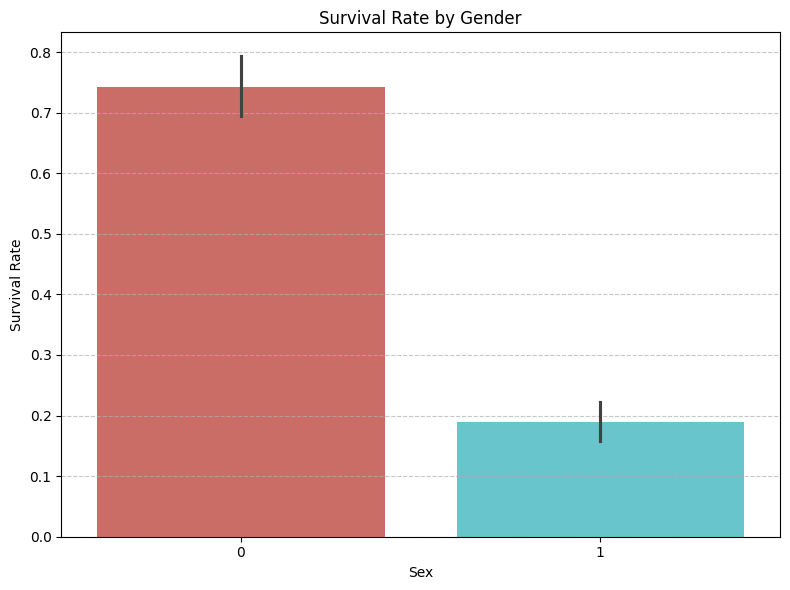

In [6]:
# Plot survival rate by gender
palette = 'hls'  # You can choose from various built-in palettes like 'hls', 'OrRd', etc.

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data, palette=palette)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar plot illustrates a significant gender disparity in survival rates on the Titanic. **Female passengers had a significantly higher chance of survival compared to male passengers.** This finding underscores the societal norms and practices of the time, which often prioritized women and children for rescue.

**Survival Rate by Passenger Class**

<ipython-input-7-5627b36b4a01>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_data, palette=palette)  # Add palette argument


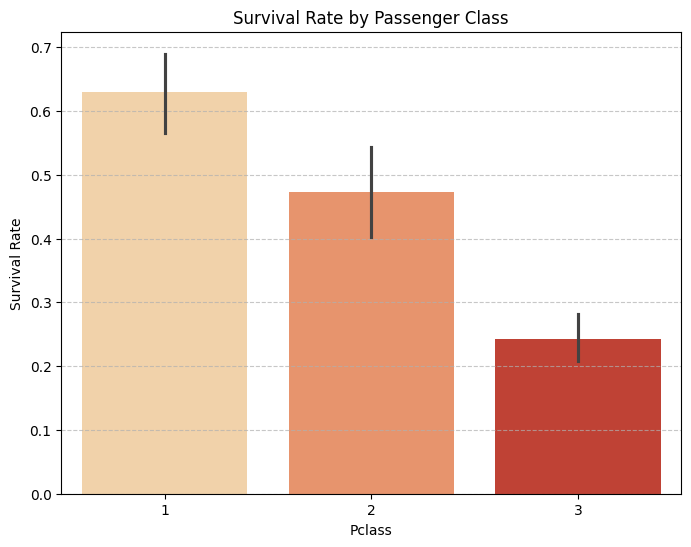

In [7]:
palette = 'OrRd'  # You can choose from various built-in palettes like 'hls', 'OrRd', etc.

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data, palette=palette)  # Add palette argument
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This bar plot reveals a clear correlation between passenger class and survival rates on the Titanic. **Passengers in the first class had the highest survival rate, followed by those in the second class.** In contrast, passengers in the third class had the lowest survival rate. This disparity likely reflects the allocation of lifeboats and rescue efforts, which prioritized passengers from higher social classes.

**Survival Rate by Age Group**

<ipython-input-8-05de428e7bc4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=train_data, palette=palette)


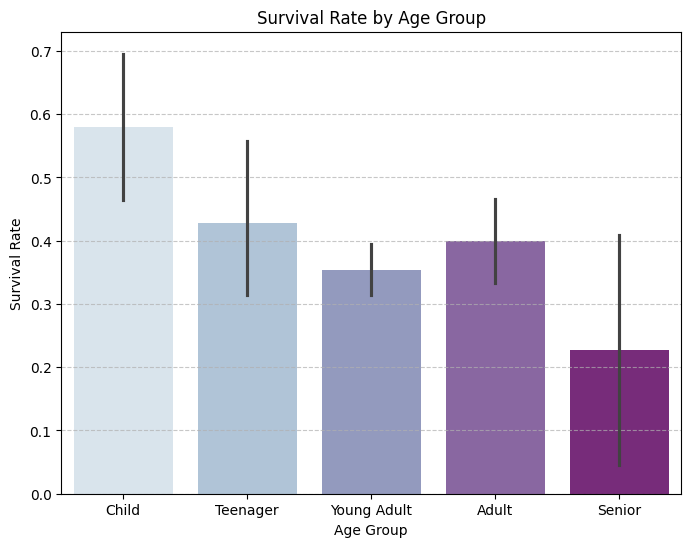

In [8]:
# Define age groups
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

# Plot survival rate by age group
plt.figure(figsize=(8, 6))
palette = 'BuPu'
sns.barplot(x='AgeGroup', y='Survived', data=train_data, palette=palette)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This bar plot illustrates how survival rates varied across different age groups on the Titanic. **Children and teenagers generally had higher survival rates compared to adults and seniors.** This trend likely reflects the prioritization of women and children during rescue efforts, as well as the physical capabilities of younger individuals.

# **4. Model Building**

---

**Preparing the Data**

In [9]:
# Features selected on the basis of features importance
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Training and Evaluating Models**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Train and evaluate each model
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'SVM': svm}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{name} Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred))


Logistic Regression Accuracy: 0.8101
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Accuracy: 0.8212
[[92 13]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

SVM Accuracy: 0.6592
[[99  6]
 [55 19]]
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                        

In [12]:
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8212290502793296
Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# **5. Hyperparameters Tuning**

---



In [13]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate the tuned model on the test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)

# Print evaluation metrics
print(f"Best Random Forest Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Random Forest Accuracy: 0.8156
[[95 10]
 [23 51]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



# **6. Model Comparison**

---



In [14]:
# Compare model accuracy
model_accuracies = {
    'Logistic Regression': accuracy_score(y_val, logreg.predict(X_val)),
    'Random Forest': accuracy_score(y_val, models['Random Forest'].predict(X_val)), # Use models['Random Forest'] to access the fitted Random Forest model
    'SVM': accuracy_score(y_val, svm.predict(X_val)),
    'Best Random Forest': accuracy_score(y_val, best_rf.predict(X_val)) # Use best_rf to access the best Random Forest model
}

# Display the accuracies of the models
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8101
Random Forest Accuracy: 0.8212
SVM Accuracy: 0.6592
Best Random Forest Accuracy: 0.8156


# **7. Feature Importance for Random Forest**

---



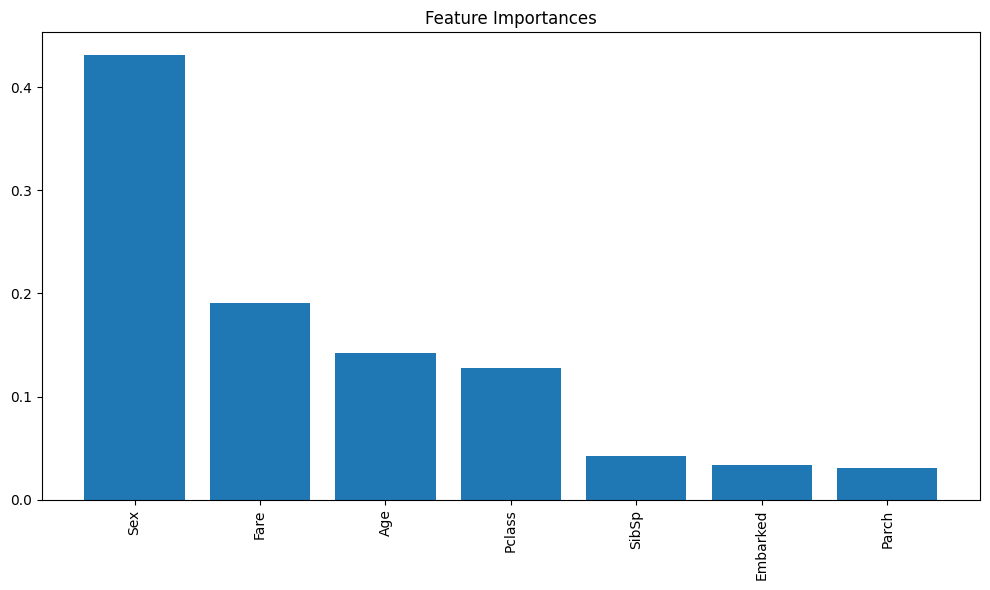

In [15]:
# Get feature importances from the best Random Forest model
importances = best_rf.feature_importances_

# Sort the feature importances in descending order and get the corresponding feature names
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


This bar chart highlights the relative importance of different features in predicting survival on the Titanic, as determined by a Random Forest model. **Sex emerges as the most influential factor, followed by Fare, Age, and Pclass.** These findings suggest that gender, ticket fare, age, and passenger class played significant roles in determining survival outcomes.

# **8. Final Submission**

---



In [16]:
test_df = pd.read_csv('/content/drive/MyDrive/Kaggle dataset/Titanic dataset/test.csv')
gender_submission_df = pd.read_csv('/content/drive/MyDrive/Kaggle dataset/Titanic dataset/gender_submission.csv')

# Step 1: Data Preprocessing
# Fill missing values
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Step 2: Encode categorical features
label = LabelEncoder()
test_df['Sex'] = label.fit_transform(test_df['Sex'])
test_df['Embarked'] = label.fit_transform(test_df['Embarked'])

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_test_final = test_df[features]


In [17]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [18]:
y_val_pred = rf_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8156424581005587
Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [19]:
y_test_pred = rf_model.predict(X_test_final)


In [22]:

# Step 8: Prepare the submission
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_test_pred
})

# Save the predicted results to a CSV file
submission.to_csv('Submission.csv', index=False)
print("Prediction file saved as submission.csv")


Prediction file saved as submission.csv
